# Example: Subset SELFE dataset given a polygon

In [1]:
import cf_xarray # noqa
import datetime
import fsspec
import numpy as np
import xarray as xr

import xarray_subset_grid.accessor  # noqa: F401

date = datetime.datetime.now().strftime("%Y%m%d")

# open dataset as zarr object using fsspec reference file system and xarray
fs = fsspec.filesystem(
    "reference",
    fo=f"s3://nextgen-dmac-cloud-ingest/nos/creofs/nos.creofs.fields.forecast.{date}.t03z.nc.zarr",
    remote_protocol="s3",
    remote_options={"anon": True},
    target_protocol="s3",
    target_options={"anon": True},
)
m = fs.get_mapper("")

ds = xr.open_dataset(
    m,
    engine="zarr",
    backend_kwargs=dict(consolidated=False),
    chunks={},
)
ds

<xarray.Dataset> Size: 4GB
Dimensions:      (sigma: 37, time: 49, node: 74061, nface: 3, nele: 142684,
                  nv: 54, nz: 17)
Coordinates:
    lat          (node) float32 296kB dask.array<chunksize=(74061,), meta=np.ndarray>
    lon          (node) float32 296kB dask.array<chunksize=(74061,), meta=np.ndarray>
  * sigma        (sigma) float32 148B -1.0 -0.9722 -0.9444 ... -0.02778 0.0
  * time         (time) datetime64[ns] 392B 2024-07-25T03:00:00 ... 2024-07-2...
Dimensions without coordinates: node, nface, nele, nv, nz
Data variables: (12/18)
    Cs           (sigma) float32 148B dask.array<chunksize=(37,), meta=np.ndarray>
    Pair         (time, node) float32 15MB dask.array<chunksize=(1, 74061), meta=np.ndarray>
    ele          (nface, nele) int32 2MB dask.array<chunksize=(3, 142684), meta=np.ndarray>
    h            (node) float32 296kB dask.array<chunksize=(74061,), meta=np.ndarray>
    offset       (node) float32 296kB dask.array<chunksize=(74061,), meta=np.ndarray>
    salinity     (time, nv, node) float32 784MB dask.array<chunksize=(1, 54, 74061), meta=np.ndarray>
    ...           ...
    x            (node) float32 296kB dask.array<chunksize=(74061,), meta=np.ndarray>
    y            (node) float32 296kB dask.array<chunksize=(74061,), meta=np.ndarray>
    z            (nz) float32 68B dask.array<chunksize=(17,), meta=np.ndarray>
    zeta         (time, node) float32 15MB dask.array<chunksize=(1, 74061), meta=np.ndarray>
    zeta_adj     (time, node) float32 15MB dask.array<chunksize=(1, 74061), meta=np.ndarray>
    zval         (time, nv, node) float32 784MB dask.array<chunksize=(1, 54, 74061), meta=np.ndarray>
Attributes:
    Vertical_type:    Hybrid SZ vertical coordinates, K=1 for bottom
    grid_type:        Unstructured model grid:
    history:          Created at Eastern Local Time 04:25  07/25/2024
    model_developer:  Oregon Health & Science University
    model_link:       http://www.ccalmr.ogi.edu/CORIE/modeling/selfe
    reference:        Created by CO-OPS/NOS/NOAA
    source:           SELFE-MPI Version 3.1dc
    title:            Columbia River & Estuarine Operational Forecast System
    type:             gridded/field NetCDF file - CF-1.0

Fixup any inconsistencies with regards to the datasets UGRID specification, for this example we have to explicitely set the `face_node_connectivity` parameter because the mesh is not included as a data variable

In [2]:
ds = xarray_subset_grid.grids.ugrid.assign_ugrid_topology(ds, face_node_connectivity='ele')
ds

<xarray.Dataset> Size: 4GB
Dimensions:      (sigma: 37, time: 49, node: 74061, nface: 3, nele: 142684,
                  nv: 54, nz: 17)
Coordinates:
    lat          (node) float32 296kB dask.array<chunksize=(74061,), meta=np.ndarray>
    lon          (node) float32 296kB dask.array<chunksize=(74061,), meta=np.ndarray>
  * sigma        (sigma) float32 148B -1.0 -0.9722 -0.9444 ... -0.02778 0.0
  * time         (time) datetime64[ns] 392B 2024-07-25T03:00:00 ... 2024-07-2...
Dimensions without coordinates: node, nface, nele, nv, nz
Data variables: (12/19)
    Cs           (sigma) float32 148B dask.array<chunksize=(37,), meta=np.ndarray>
    Pair         (time, node) float32 15MB dask.array<chunksize=(1, 74061), meta=np.ndarray>
    ele          (nface, nele) int32 2MB dask.array<chunksize=(3, 142684), meta=np.ndarray>
    h            (node) float32 296kB dask.array<chunksize=(74061,), meta=np.ndarray>
    offset       (node) float32 296kB dask.array<chunksize=(74061,), meta=np.ndarray>
    salinity     (time, nv, node) float32 784MB dask.array<chunksize=(1, 54, 74061), meta=np.ndarray>
    ...           ...
    y            (node) float32 296kB dask.array<chunksize=(74061,), meta=np.ndarray>
    z            (nz) float32 68B dask.array<chunksize=(17,), meta=np.ndarray>
    zeta         (time, node) float32 15MB dask.array<chunksize=(1, 74061), meta=np.ndarray>
    zeta_adj     (time, node) float32 15MB dask.array<chunksize=(1, 74061), meta=np.ndarray>
    zval         (time, nv, node) float32 784MB dask.array<chunksize=(1, 54, 74061), meta=np.ndarray>
    mesh         int32 4B 0
Attributes:
    Vertical_type:    Hybrid SZ vertical coordinates, K=1 for bottom
    grid_type:        Unstructured model grid:
    history:          Created at Eastern Local Time 04:25  07/25/2024
    model_developer:  Oregon Health & Science University
    model_link:       http://www.ccalmr.ogi.edu/CORIE/modeling/selfe
    reference:        Created by CO-OPS/NOS/NOAA
    source:           SELFE-MPI Version 3.1dc
    title:            Columbia River & Estuarine Operational Forecast System
    type:             gridded/field NetCDF file - CF-1.0

Recognize the grid as a SELFE grid

In [3]:
ds.xsg.grid.name

'selfe'

In [4]:
f"Dataset size: {ds.nbytes * 1.0e-9} Gb"

'Dataset size: 3.995378548 Gb'

Lets subset to the surface

In [5]:
ds_surface = ds.xsg.subset_surface_level(method='nearest')
ds_surface

<xarray.Dataset> Size: 149MB
Dimensions:      (time: 49, node: 74061, nface: 3, nele: 142684, nz: 17)
Coordinates:
    lat          (node) float32 296kB dask.array<chunksize=(74061,), meta=np.ndarray>
    lon          (node) float32 296kB dask.array<chunksize=(74061,), meta=np.ndarray>
    sigma        float32 4B 0.0
  * time         (time) datetime64[ns] 392B 2024-07-25T03:00:00 ... 2024-07-2...
Dimensions without coordinates: node, nface, nele, nz
Data variables: (12/19)
    Cs           float32 4B dask.array<chunksize=(), meta=np.ndarray>
    Pair         (time, node) float32 15MB dask.array<chunksize=(1, 74061), meta=np.ndarray>
    ele          (nface, nele) int32 2MB dask.array<chunksize=(3, 142684), meta=np.ndarray>
    h            (node) float32 296kB dask.array<chunksize=(74061,), meta=np.ndarray>
    offset       (node) float32 296kB dask.array<chunksize=(74061,), meta=np.ndarray>
    salinity     (time, node) float32 15MB dask.array<chunksize=(1, 74061), meta=np.ndarray>
    ...           ...
    y            (node) float32 296kB dask.array<chunksize=(74061,), meta=np.ndarray>
    z            (nz) float32 68B dask.array<chunksize=(17,), meta=np.ndarray>
    zeta         (time, node) float32 15MB dask.array<chunksize=(1, 74061), meta=np.ndarray>
    zeta_adj     (time, node) float32 15MB dask.array<chunksize=(1, 74061), meta=np.ndarray>
    zval         (time, node) float32 15MB dask.array<chunksize=(1, 74061), meta=np.ndarray>
    mesh         int32 4B 0
Attributes:
    Vertical_type:    Hybrid SZ vertical coordinates, K=1 for bottom
    grid_type:        Unstructured model grid:
    history:          Created at Eastern Local Time 04:25  07/25/2024
    model_developer:  Oregon Health & Science University
    model_link:       http://www.ccalmr.ogi.edu/CORIE/modeling/selfe
    reference:        Created by CO-OPS/NOS/NOAA
    source:           SELFE-MPI Version 3.1dc
    title:            Columbia River & Estuarine Operational Forecast System
    type:             gridded/field NetCDF file - CF-1.0

Then we can subset the grid down to the target area

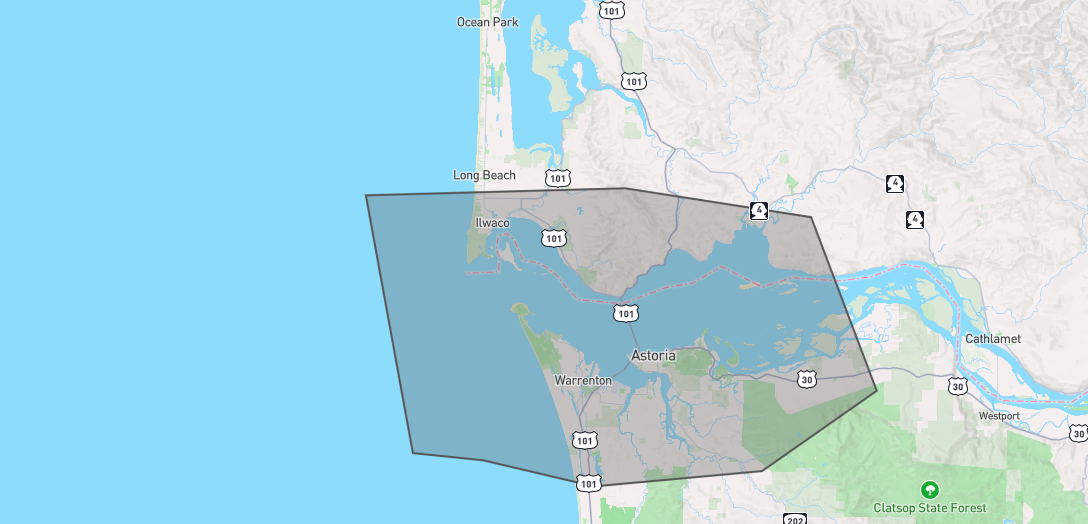

In [9]:
polygon = np.array(
    [
        [-124.2107493335611, 46.33385978494991],
        [-124.14865898498047, 46.098557502544395],
        [-124.05608944557105, 46.091919687734276],
        [-123.90949622876111, 46.06806045921755],
        [-123.68806634560113, 46.08206433450994],
        [-123.53658789732481, 46.1555125798732],
        [-123.62320946003382, 46.313992255513426],
        [-123.86869261497935, 46.340309927154266],
        [-124.2107493335611, 46.33385978494991],
    ]
)

ds_surface_subset = ds_surface.xsg.subset_polygon(polygon)
assert(ds_surface_subset is not None)
ds_surface_subset

<xarray.Dataset> Size: 27MB
Dimensions:      (time: 49, node: 13486, nface: 3, nele: 26040, nz: 17)
Coordinates:
    lat          (node) float32 54kB dask.array<chunksize=(13486,), meta=np.ndarray>
    lon          (node) float32 54kB dask.array<chunksize=(13486,), meta=np.ndarray>
    sigma        float32 4B 0.0
  * time         (time) datetime64[ns] 392B 2024-07-25T03:00:00 ... 2024-07-2...
Dimensions without coordinates: node, nface, nele, nz
Data variables: (12/19)
    Cs           float32 4B dask.array<chunksize=(), meta=np.ndarray>
    Pair         (time, node) float32 3MB dask.array<chunksize=(1, 13486), meta=np.ndarray>
    ele          (nface, nele) int32 312kB dask.array<chunksize=(3, 26040), meta=np.ndarray>
    h            (node) float32 54kB dask.array<chunksize=(13486,), meta=np.ndarray>
    offset       (node) float32 54kB dask.array<chunksize=(13486,), meta=np.ndarray>
    salinity     (time, node) float32 3MB dask.array<chunksize=(1, 13486), meta=np.ndarray>
    ...           ...
    y            (node) float32 54kB dask.array<chunksize=(13486,), meta=np.ndarray>
    z            (nz) float32 68B dask.array<chunksize=(17,), meta=np.ndarray>
    zeta         (time, node) float32 3MB dask.array<chunksize=(1, 13486), meta=np.ndarray>
    zeta_adj     (time, node) float32 3MB dask.array<chunksize=(1, 13486), meta=np.ndarray>
    zval         (time, node) float32 3MB dask.array<chunksize=(1, 13486), meta=np.ndarray>
    mesh         int32 4B 0
Attributes:
    Vertical_type:    Hybrid SZ vertical coordinates, K=1 for bottom
    grid_type:        Unstructured model grid:
    history:          Created at Eastern Local Time 04:25  07/25/2024
    model_developer:  Oregon Health & Science University
    model_link:       http://www.ccalmr.ogi.edu/CORIE/modeling/selfe
    reference:        Created by CO-OPS/NOS/NOAA
    source:           SELFE-MPI Version 3.1dc
    title:            Columbia River & Estuarine Operational Forecast System
    type:             gridded/field NetCDF file - CF-1.0

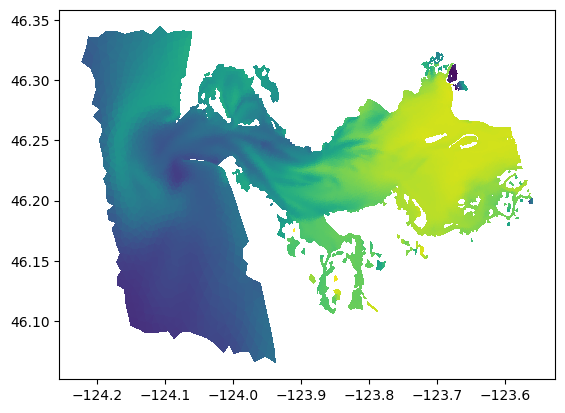

In [10]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri

salinity = ds_surface_subset.temp.isel(time=0)
tris = tri.Triangulation(
    salinity.cf["longitude"],
    salinity.cf["latitude"],
    triangles=ds_surface_subset[ds_surface_subset.mesh.face_node_connectivity].T - 1,
)
plt.tripcolor(tris, salinity, shading="flat")

In [11]:
f"Subset dataset size: {ds_surface_subset.nbytes * 1.0e-6} Mb"

'Subset dataset size: 27.06918 Mb'